# Homework 4 Assignment 2: 

Directions from Dr. Bianco : https://github.com/fedhere/PUI2018_fb55/tree/master/HW4_fb55

Formulate a question, null and alternative hypothesis for a CitiBike dataset that our team would like to investigate. Use pandas to read in the dataframe within the notebook and more it to the $PUIDATA folder. Display and plot the data. 


## Idea/Question and Hypothesis

### Idea/Question
In the CitiBikes dataset, there are 2 usertypes: Customers and Subscribers. 

**Subscribers** (Subs) are less likely to ride Citibikes on weekends in comparison to **Customers** (Cus).

### Null Hypothesis
The proportion of bike trips on weekends by riders who are **Subscribers** (Subs) is the same or more than the proportion of bike trips on weekends by riders who are **Customers** (Cus).

_$H_0$ : $\frac{Subs_{\mathrm{NumberOfTrips}}}{Weekend_{\mathrm{totalTrips}}} => \frac{Cus_{\mathrm{NumberOfTrips}}}{Weekend_{\mathrm{totalTrips}}}$

_$H_1$ : $\frac{Subs_{\mathrm{NumberOfTrips}}}{Weekend_{\mathrm{totalTrips}}} < \frac{Cus_{\mathrm{NumberOfTrips}}}{Weekend_{\mathrm{totalTrips}}}$

using a significance level of α = 0.05

In [1]:
# import the necessary libraries for this analysis.
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# PUIDATA environmental variable
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME") ## force the PUIdata variable

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yg833/PUI2018/PUIdata


Credit goes to Dr. Bianco's (@fedhere) sample citibikes_gender.ipynb for the function to pull citibikes data set and move into PUIDATA folder
https://github.com/fedhere/PUI2018_fb55/blob/master/HW4_fb55/citibikes_gender.ipynb 

In [3]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as string and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
datestring = '201606'
getCitiBikeCSV(datestring)
# Check the file and it is a zip file
# running this code for the first time only downloads the zip file. 
# ran the code 2nd time to ensure that the file is in place and is unzipped

file in place, you can continue


In [18]:
# read in the citibike data for June 2016
citidf = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [19]:
# render the first 10 obs of the citibikes dataframe
citidf.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1
5,946,6/1/2016 00:01:01,6/1/2016 00:16:48,503,E 20 St & Park Ave,40.738274,-73.987520,495,W 47 St & 10 Ave,40.762699,-73.993012,25193,Subscriber,1974.0,1
6,2351,6/1/2016 00:01:05,6/1/2016 00:40:16,533,Broadway & W 39 St,40.752996,-73.987216,386,Centre St & Worth St,40.714948,-74.002345,19538,Subscriber,1986.0,1
7,773,6/1/2016 00:01:24,6/1/2016 00:14:18,492,W 33 St & 7 Ave,40.750200,-73.990931,483,E 12 St & 3 Ave,40.732233,-73.988900,17101,Subscriber,1986.0,1
8,1929,6/1/2016 00:01:27,6/1/2016 00:33:37,525,W 34 St & 11 Ave,40.755942,-74.002116,306,Cliff St & Fulton St,40.708235,-74.005301,17802,Subscriber,1968.0,1
9,725,6/1/2016 00:01:38,6/1/2016 00:13:43,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3083,Bushwick Ave & Powers St,40.712477,-73.941000,21421,Subscriber,1971.0,2


In [20]:
# check for the column names
citidf.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [21]:
# create a date variable that is formatted into pandas format %Y-%m-%d hh:mm:ss
citidf['date'] = pd.to_datetime(citidf['starttime'])

In [22]:
# drop the columns dont need for this
citidf.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [23]:
# check the data frame again for the first 10 obs
citidf.head(10)

,usertype,date
0,Subscriber,2016-06-01 00:00:18
1,Subscriber,2016-06-01 00:00:20
2,Subscriber,2016-06-01 00:00:21
3,Subscriber,2016-06-01 00:00:28
4,Subscriber,2016-06-01 00:00:53
5,Subscriber,2016-06-01 00:01:01
6,Subscriber,2016-06-01 00:01:05
7,Subscriber,2016-06-01 00:01:24
8,Subscriber,2016-06-01 00:01:27
9,Subscriber,2016-06-01 00:01:38


#### Separate the subscribers from the customers for hypothesis testing. 
#### Then plot the number of trips by day of week.

Text(0.5,1,'Count of Citibike Trips By User Type in June 2016')

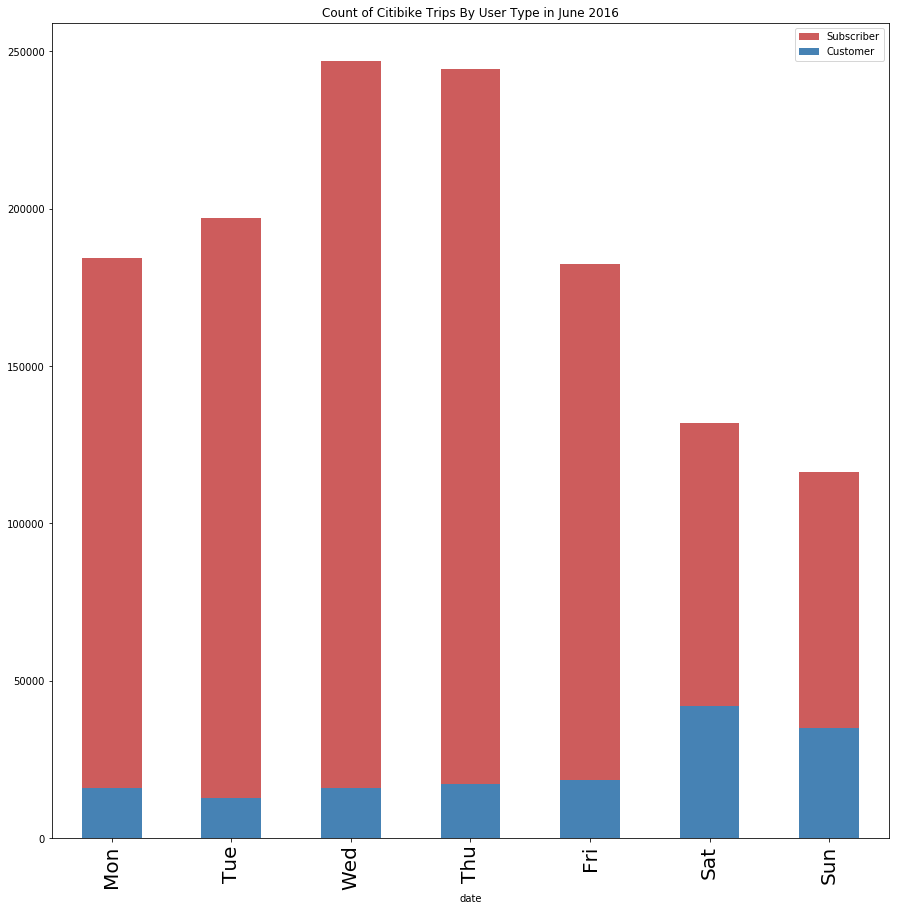

In [32]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((citidf['date'][citidf['usertype'] == 'Subscriber'].groupby([citidf['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Subscriber')

norm_m = 1
ax = ((citidf['date'][citidf['usertype'] == 'Customer'].groupby([citidf['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              label='Customer')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

pl.title('Count of Citibike Trips By User Type in June 2016')


#### Figure 1: Distribution of Citibike trips by User Type in June 2016, absolute count of trips.

Text(0.5,1,'Count of Citibike Trips By User Type in June 2016 with Error Bars')

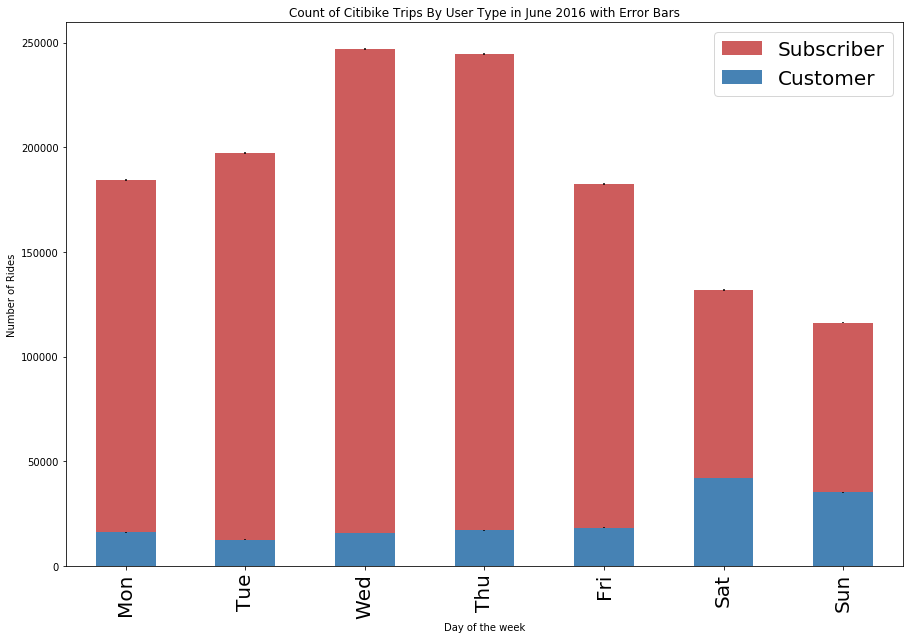

In [33]:
## following a Poisson statistic because counts. and get the error using sqrt of the counts

fig=pl.figure(figsize(15,10))

counts_s = citidf.date[citidf.usertype == 'Subscriber'].groupby([citidf.date.dt.weekday]).count()
norm_s = 1
error_s = np.sqrt(counts_s)
ax=((counts_s) / norm_s).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_s) / norm_s, (error_s) / norm_s)], label='Subscriber')


counts_c = citidf.date[citidf.usertype== 'Customer'].groupby([citidf.date.dt.weekday]).count()
norm_c = 1
error_c=np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           color='SteelBlue', label='Customer')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of Rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Subscriber','Customer'],fontsize=20)

pl.title('Count of Citibike Trips By User Type in June 2016 with Error Bars')


#### Figure 2: Distribution of Citibike trips by User Type in June 2016, absolute counts, with statistical errors.